In [87]:

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import os
import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange
from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *
from dots.datasets import *
from dots.experiment import get_train_state, get_config_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
good_cnn = load_model("easy-sweep-7")
good_cnn

BasicCNN(
  (layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=200, out_features=10, bias=True)
)

In [5]:
mnist = get_dataset("mnist")

In [6]:
len(mnist)

60000

In [7]:
accuracy(good_cnn, mnist)

tensor(0.9805)

In [8]:
ts = get_train_state("../configs/models/cnn-mnist-good.yml")
ts.model.count_params()

2346

In [9]:
batch, y = x_y_tensors_of_dataset(mnist, range(100))
batch.shape

torch.Size([100, 1, 28, 28])

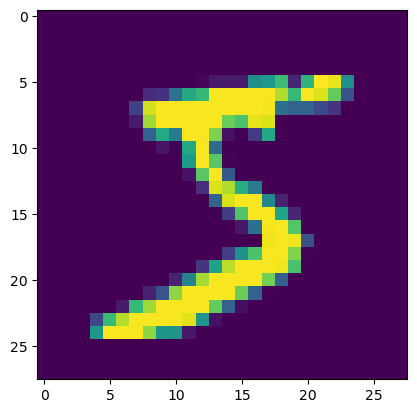

In [10]:
plt.imshow(batch[0, 0])

In [11]:
y

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [12]:
ts.model.jacobian(batch).shape

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


torch.Size([100, 10, 2346])

In [13]:
jac = ts.model.matrix_jacobian(batch)
jac.shape

torch.Size([1000, 2346])

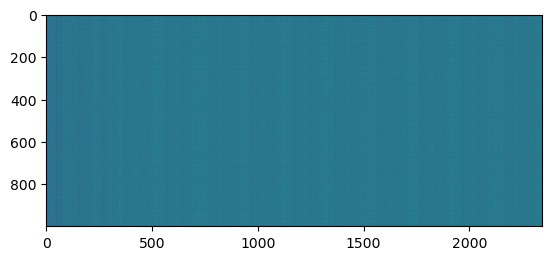

In [14]:
plt.imshow(jac.detach().numpy())

## Start of training

### With bias

In [15]:
batch.shape

torch.Size([100, 1, 28, 28])

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


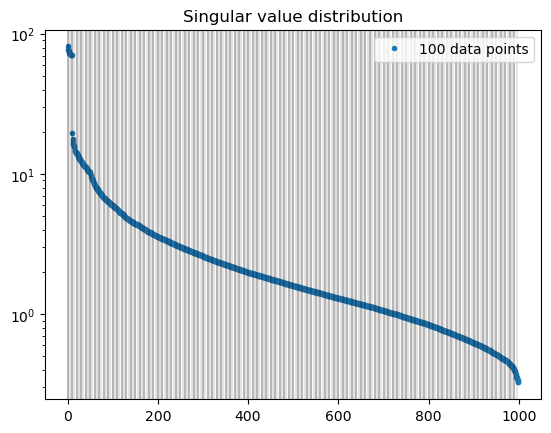

In [186]:
plot_singular_value_distribution(ts.model, batch)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


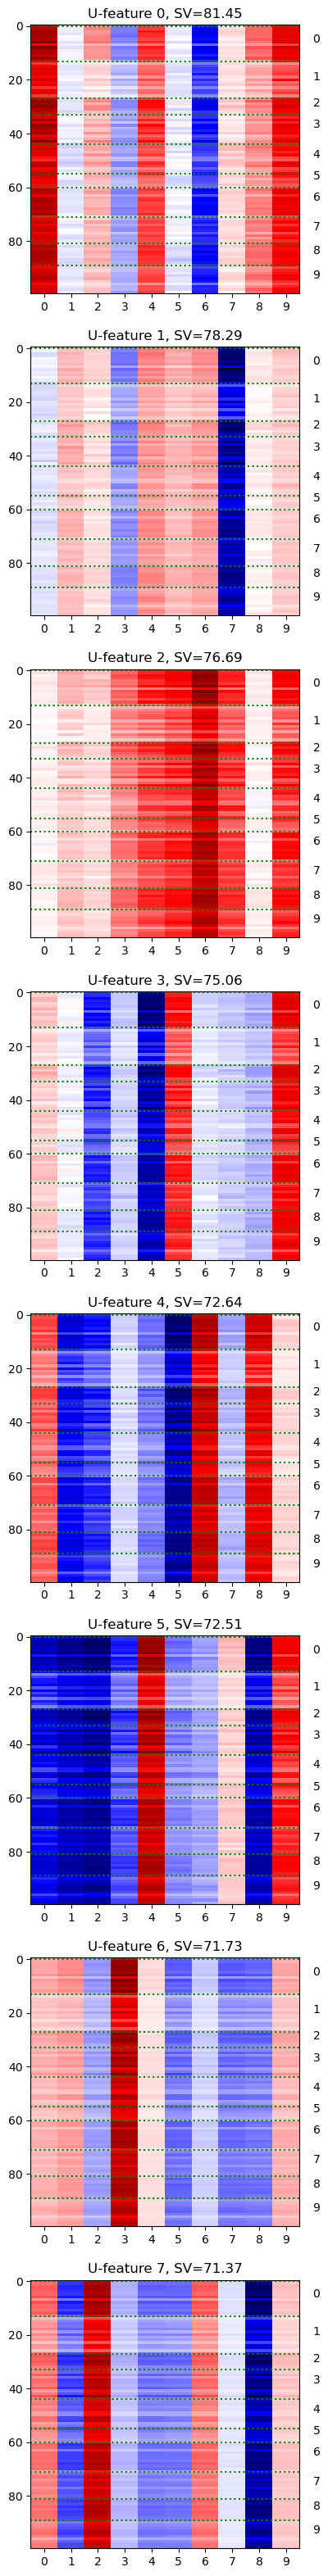

In [16]:
plot_top_2d_u_feats(ts.model, batch, y, max_feats=8, figsize=(20, 40))

### Without bias

In [182]:
from dots.models import *

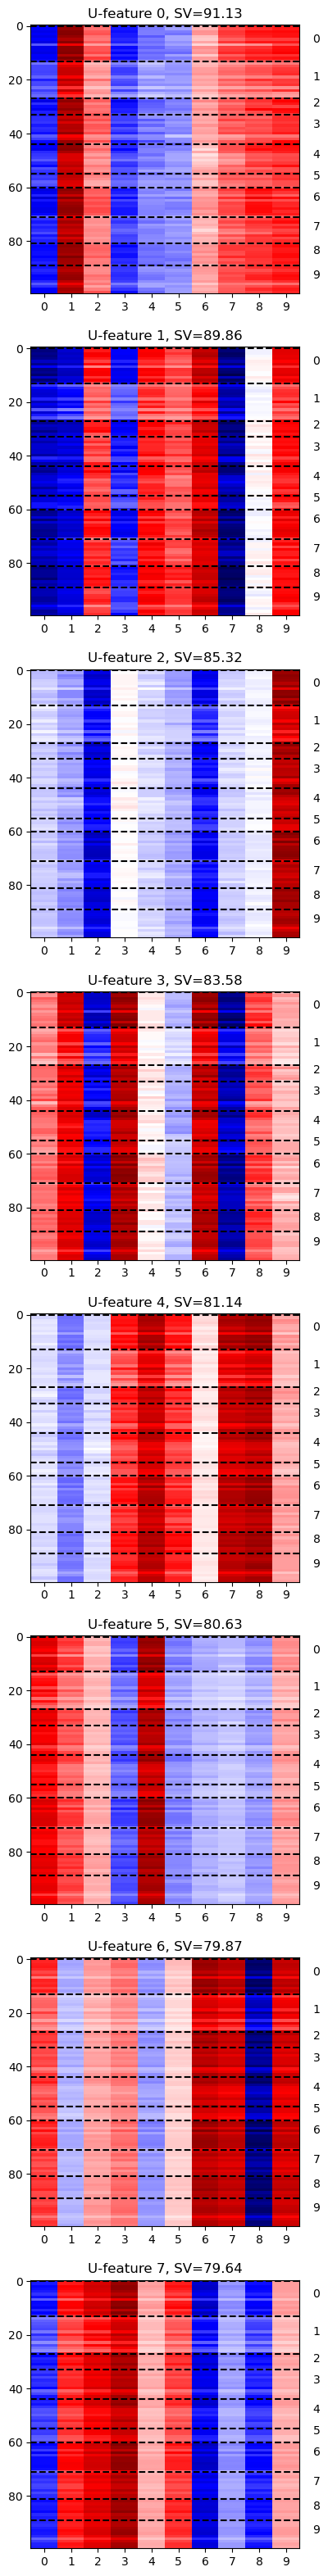

In [183]:
plot_top_2d_u_feats(
    BasicCNN(fc_bias=False),
    batch, 
    y, 
    max_feats=8, 
    figsize=(20, 40)
)

## After training on good MNIST classifier

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


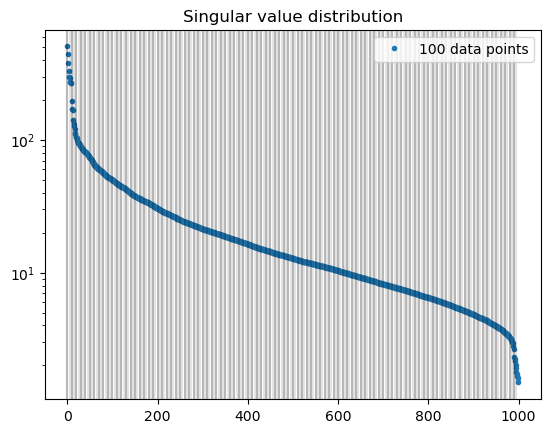

In [187]:
plot_singular_value_distribution(good_cnn, batch)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


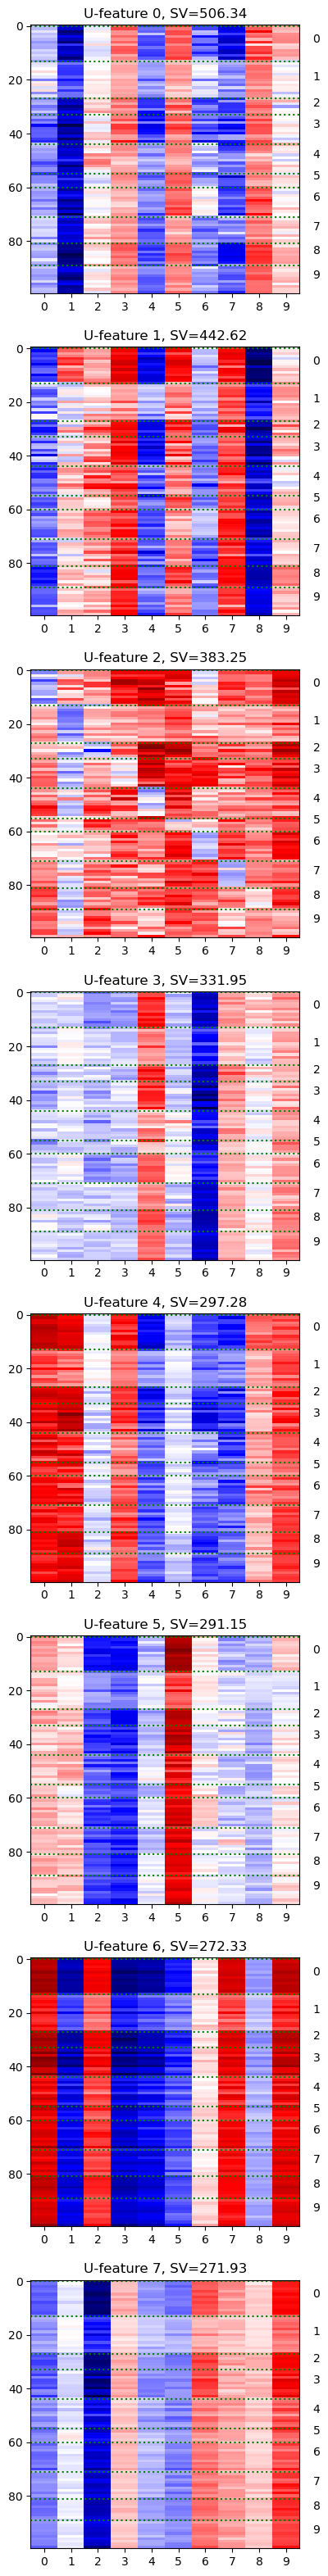

In [34]:
plot_top_2d_u_feats(good_cnn, batch, y, max_feats=8, figsize=(20, 40))

In [35]:
good_cnns = [
    "vibrant-sweep-30",
    "twilight-sweep-4", # high acc, low data DOTS
#    "curious-sweep-13" # high acc, low data+rand DOTS -- LOST TO TIME!!! :( :( :(
    "scarlet-sweep-8",
    "cerulean-sweep-7",
    "glamorous-sweep-16"
]

for name in good_cnns:
    load_model(name, loc="models2")

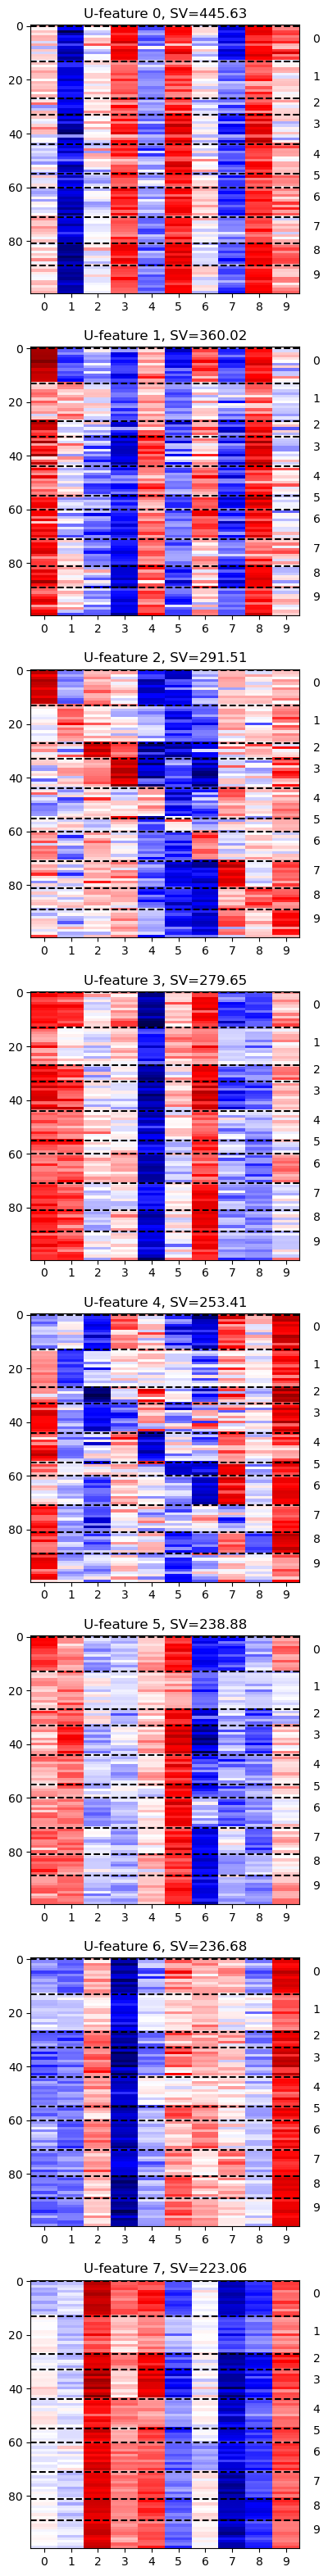

In [181]:
cnn = load_model(good_cnns[0], loc="models2")
plot_top_2d_u_feats(cnn, batch, y, max_feats=8, figsize=(20, 40))

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:372: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


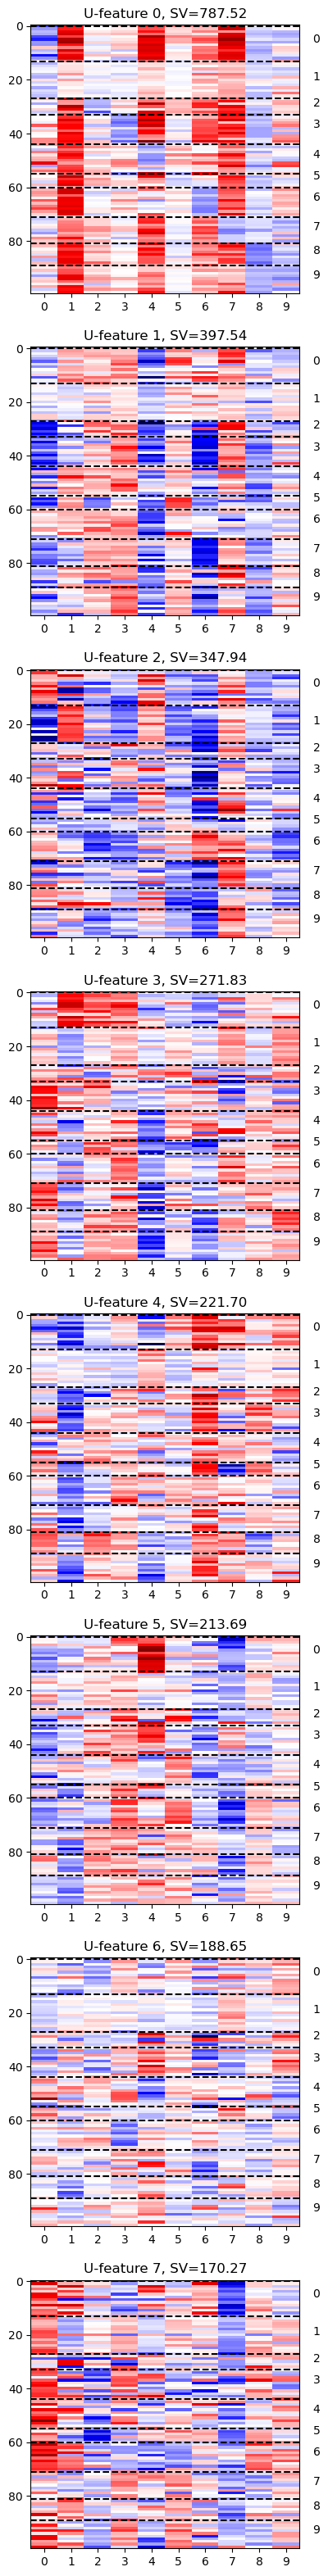

In [179]:
cnn = load_model(good_cnns[1], loc="models2")
plot_top_2d_u_feats(cnn, batch, y, max_feats=8, figsize=(20, 40))

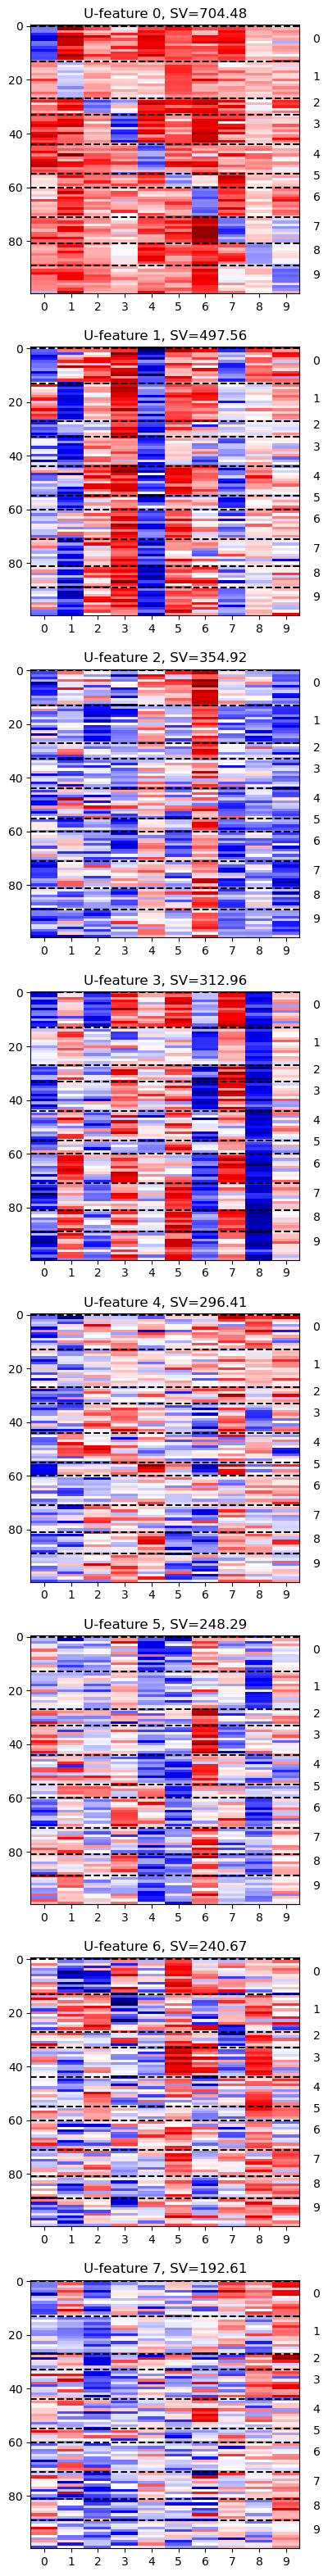

In [180]:
cnn = load_model(good_cnns[2], loc="models2")
plot_top_2d_u_feats(cnn, batch, y, max_feats=8, figsize=(20, 40))

# CNNs without bias - do they have vertical stripes?

In [39]:
nobias_cnns_good = [
    "eager-sweep-16",
    "flowing-sweep-15",
    "polar-sweep-13",
    "warm-sweep-11",
    "fiery-sweep-10",
    "restful-sweep-3"
]
for name in nobias_cnns_good:
    load_model(name, loc="models2")

In [40]:
good_cnns

['vibrant-sweep-30',
 'twilight-sweep-4',
 'scarlet-sweep-8',
 'cerulean-sweep-7',
 'glamorous-sweep-16']

In [90]:
models_no_bias = [load_model(name, loc="models2") for name in nobias_cnns_good]

models_w_bias = [load_model(name, loc="models2") for name in good_cnns]

## Visualisation

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:372: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  def plot_u_feats_img(start, end, n, model, ax=None):


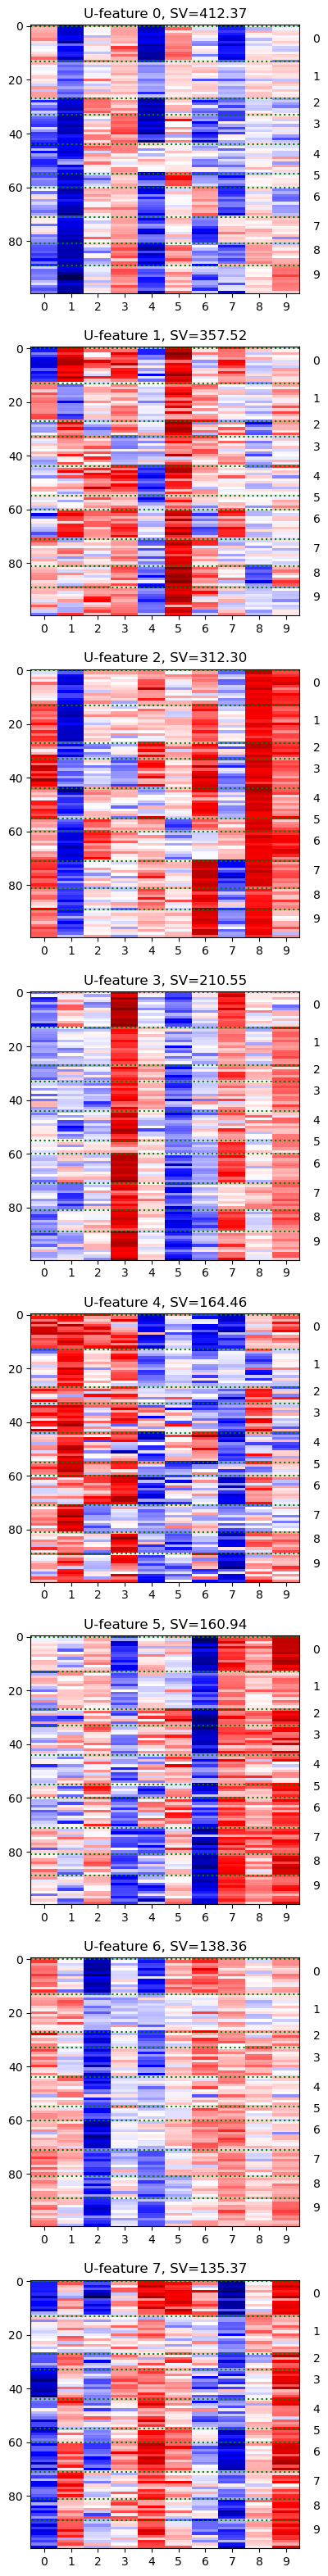

In [141]:
plot_top_2d_u_feats(models_no_bias[0], batch, y, max_feats=8, figsize=(20, 40))

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:372: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


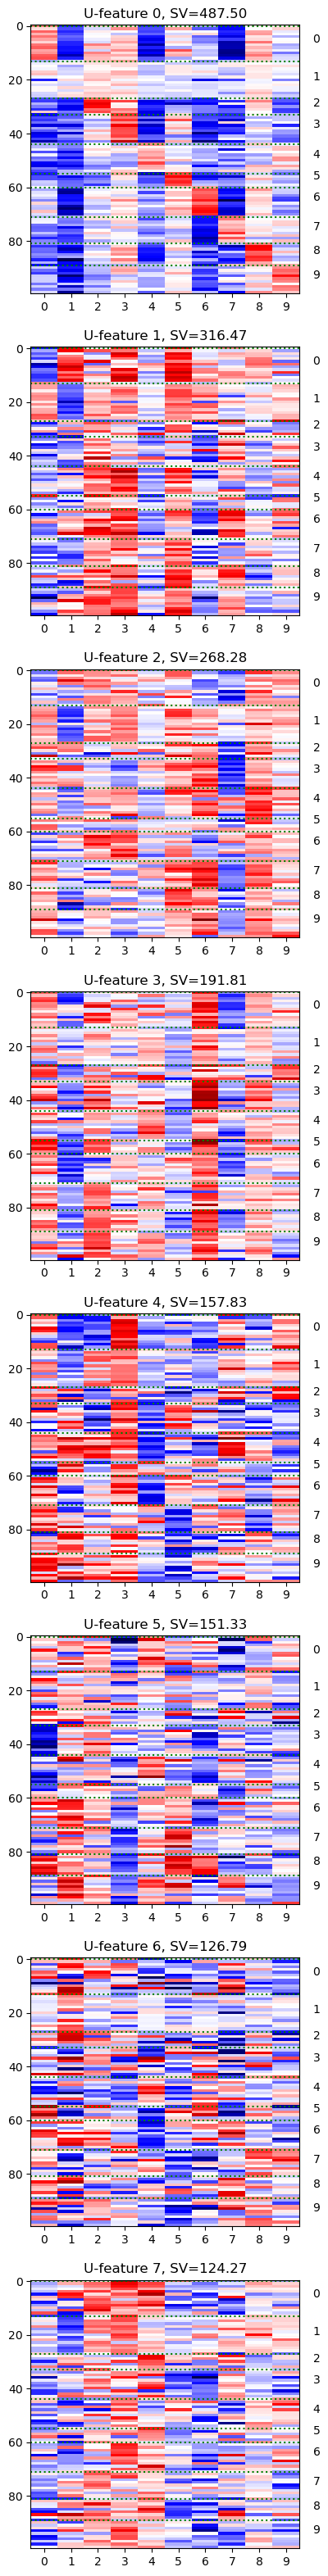

In [164]:
plot_top_2d_u_feats(models_no_bias[1], batch, y, max_feats=8, figsize=(20, 40))

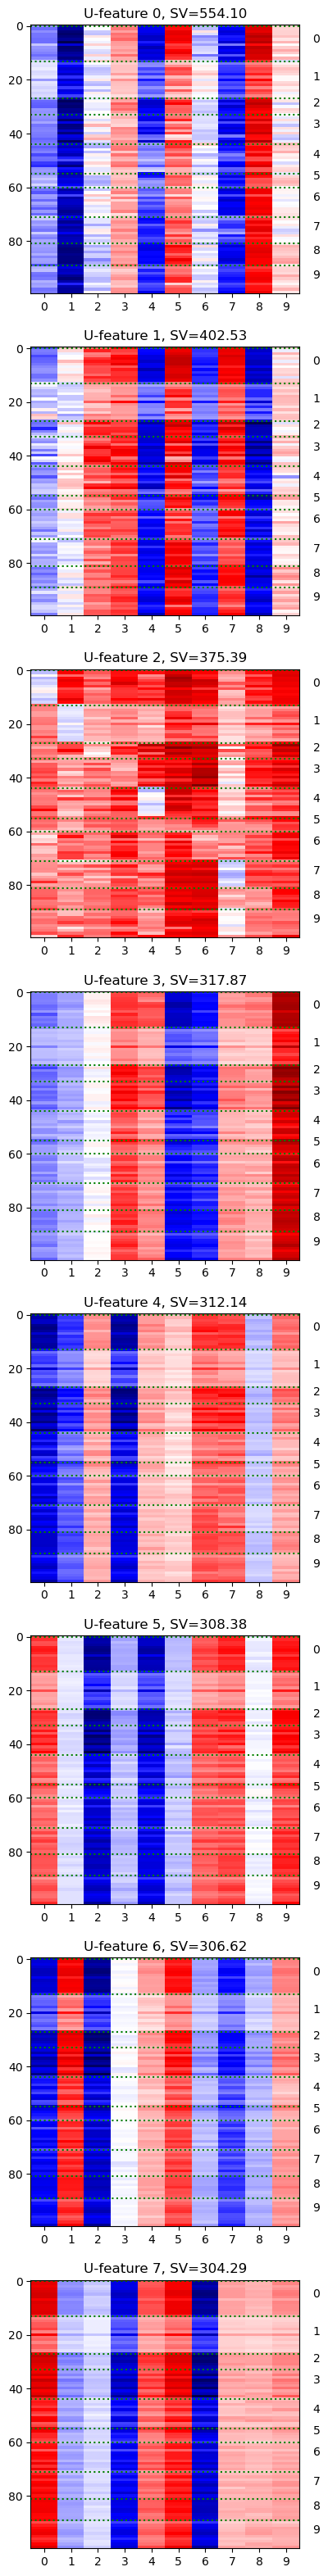

In [165]:
plot_top_2d_u_feats(models_no_bias[2], batch, y, max_feats=8, figsize=(20, 40))

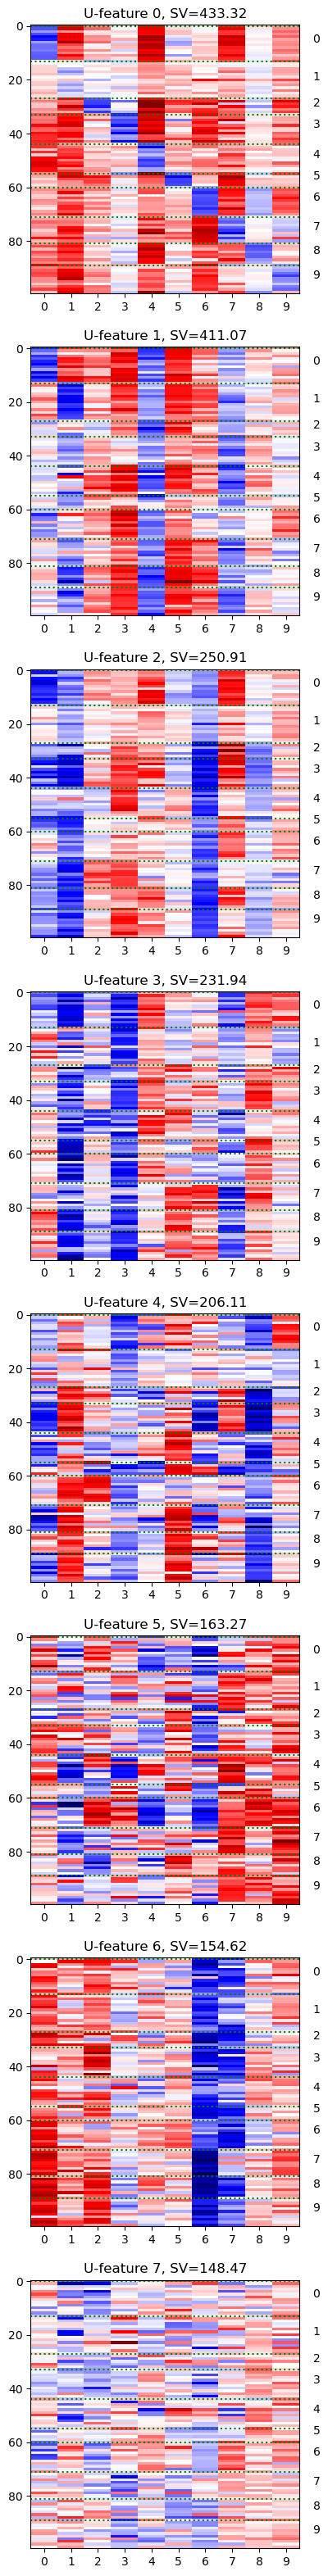

In [166]:
plot_top_2d_u_feats(models_no_bias[3], batch, y, max_feats=8, figsize=(20, 40))

#### with bias

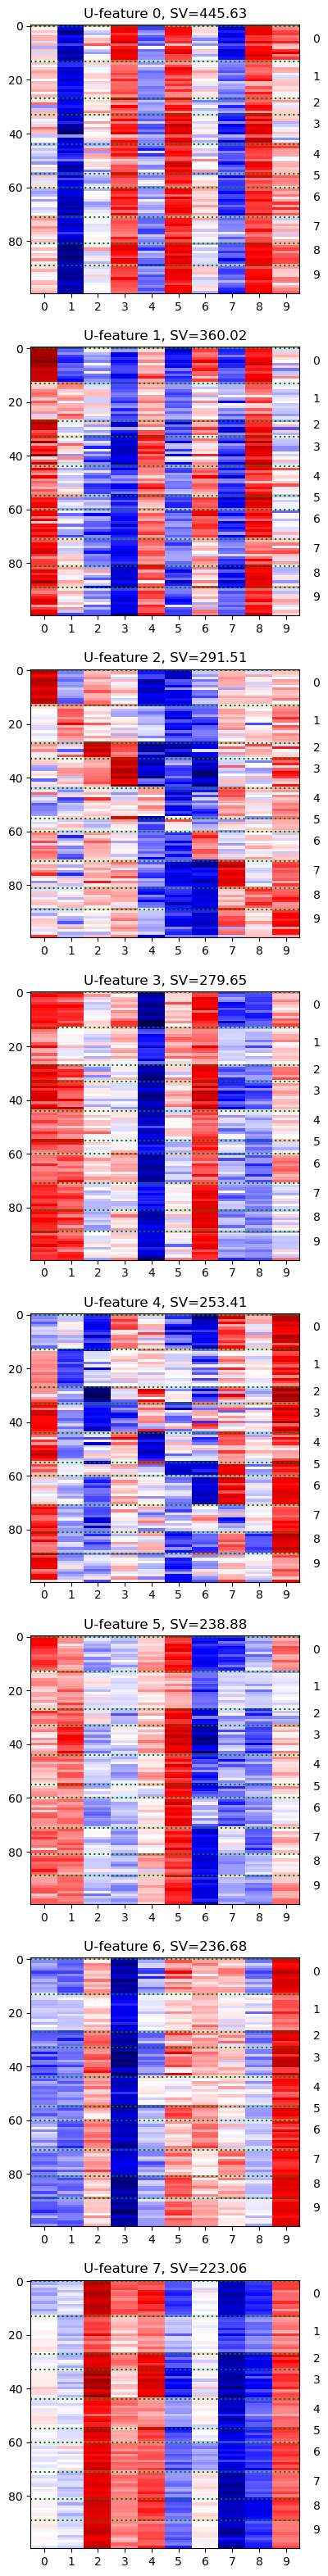

In [167]:
plot_top_2d_u_feats(models_w_bias[0], batch, y, max_feats=8, figsize=(20, 40))

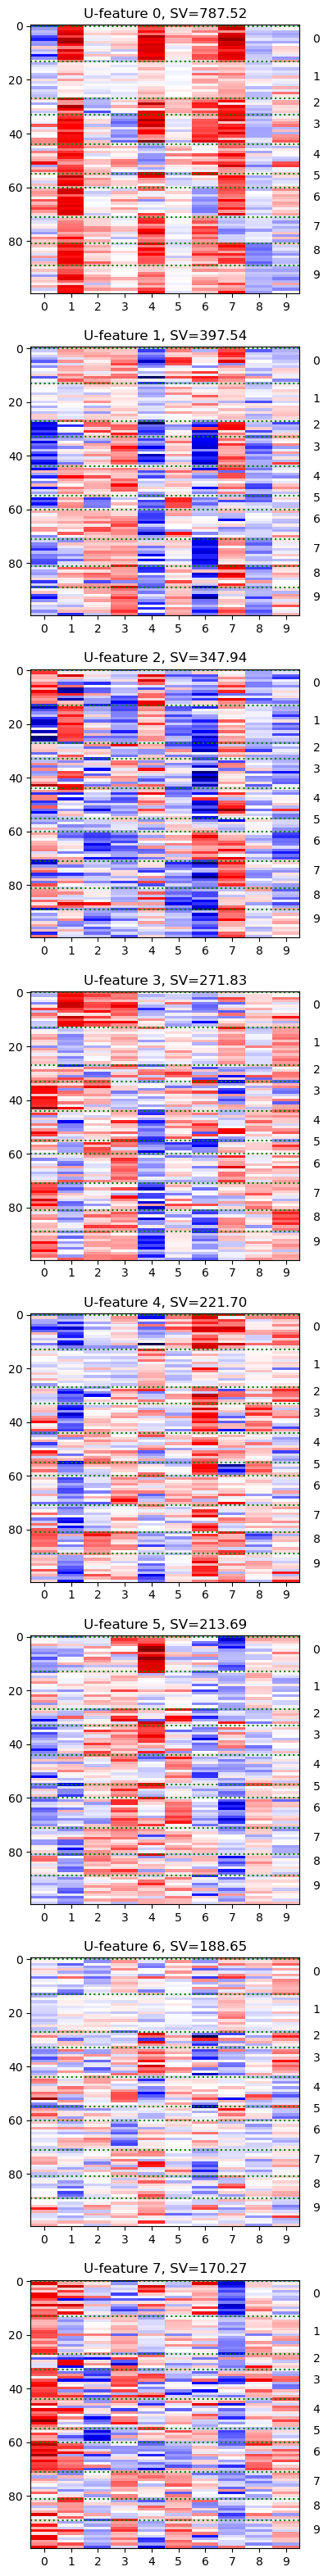

In [168]:
plot_top_2d_u_feats(models_w_bias[1], batch, y, max_feats=8, figsize=(20, 40))

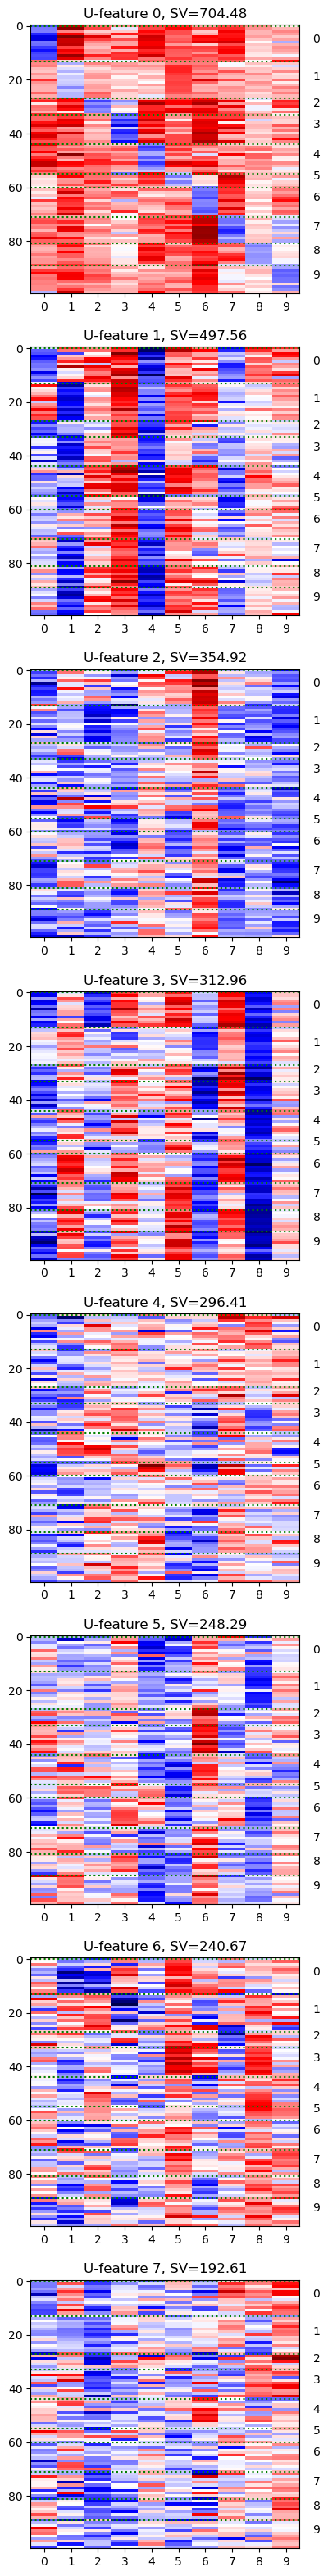

In [169]:
plot_top_2d_u_feats(models_w_bias[2], batch, y, max_feats=8, figsize=(20, 40))


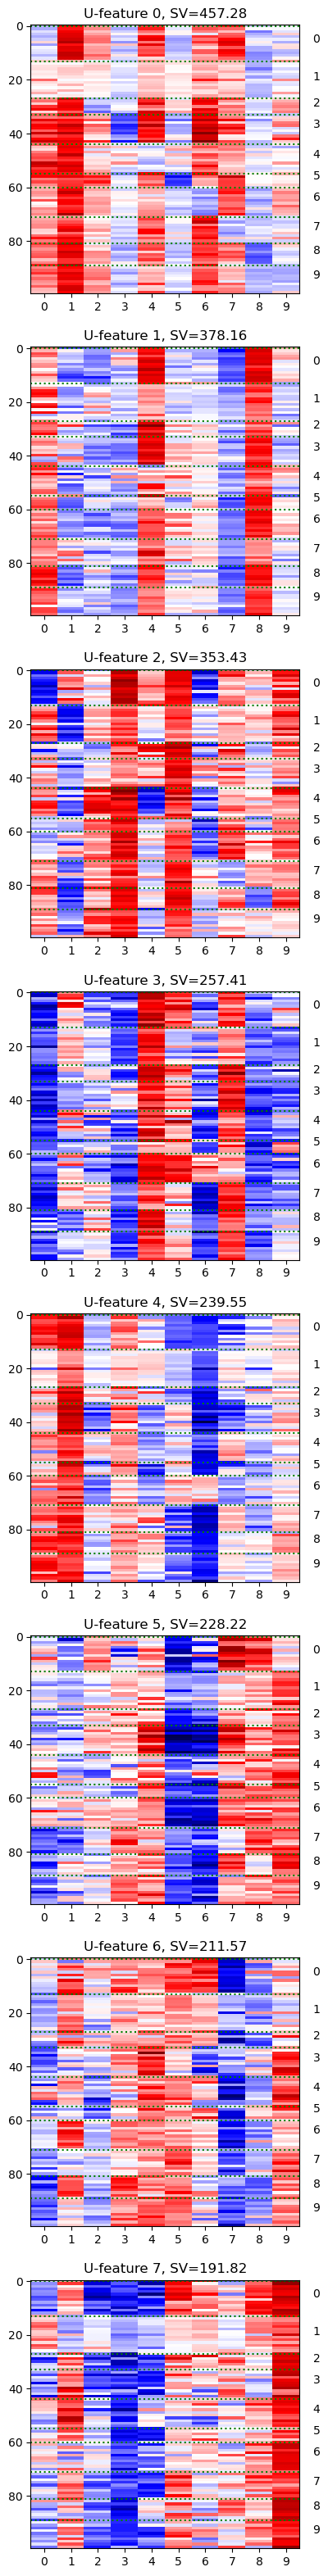

In [170]:
plot_top_2d_u_feats(models_w_bias[3], batch, y, max_feats=8, figsize=(20, 40))

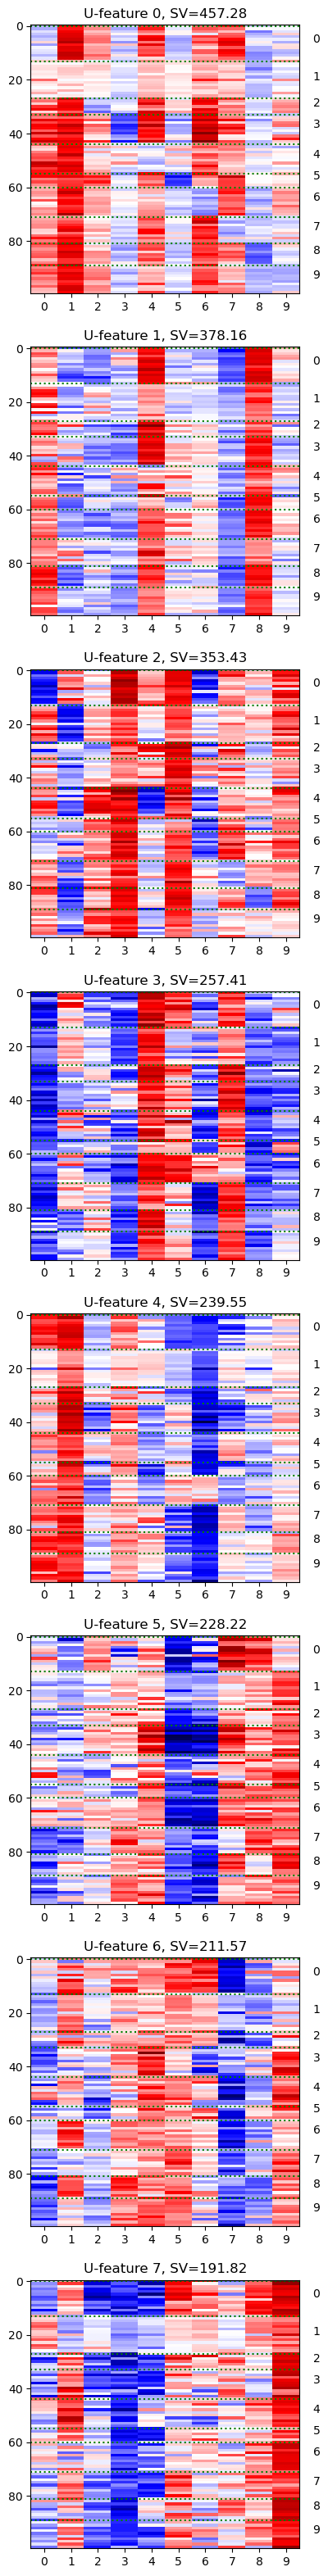

In [171]:
plot_top_2d_u_feats(models_w_bias[3], batch, y, max_feats=8, figsize=(20, 40))

## Stats stuff

In [134]:
def ufeat_column_means(model, batch, y):
    ufeats = canonical_2d_ufeats(model, batch, y)
    return t.einsum("rnc -> rc", ufeats) / ufeats.shape[1]

In [138]:
means = ufeat_column_means(models_no_bias[0], batch, y)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


In [139]:
means.shape

torch.Size([1000, 10])

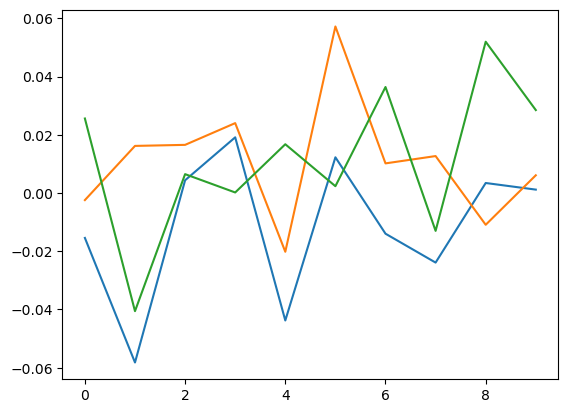

In [163]:
plt.plot(means[0])
plt.plot(means[1])
plt.plot(means[2])

In [143]:
def ufeat_model_col_variance(model, batch, y):
    col_means = ufeat_column_means(model, batch, y)
    return t.var(col_means, dim=1)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-pack

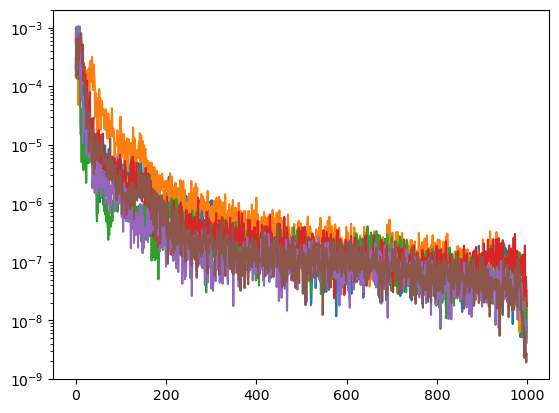

In [156]:
for model in models_no_bias:
    vars = ufeat_model_col_variance(model, batch, y)
    plt.plot(vars)
plt.yscale("log")

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-pack

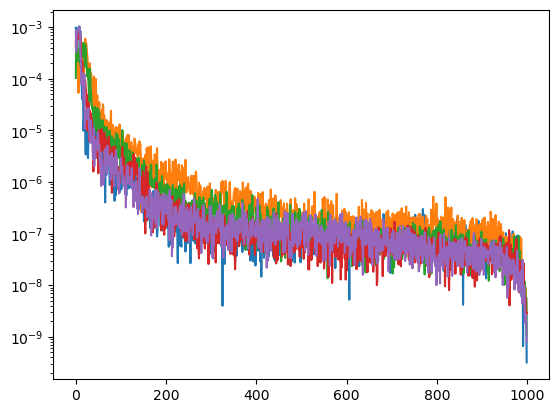

In [157]:
for model in models_w_bias:
    vars = ufeat_model_col_variance(model, batch, y)
    plt.plot(vars)
plt.yscale("log")

In [151]:
def models_avg_col_var(models, batch, y):
    col_vars = [
        t.mean(ufeat_model_col_variance(model, batch, y))
        for model in models
    ]
    return t.tensor(col_vars).mean()

In [152]:
models_avg_col_var(models_no_bias, batch, y)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(1.0000e-05)

tensor(1.0000e-05)

# CNN entropy DOTS

In [188]:
good_cnns

['vibrant-sweep-30',
 'twilight-sweep-4',
 'scarlet-sweep-8',
 'cerulean-sweep-7',
 'glamorous-sweep-16']

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(580.0359)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(452.2296)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(455.0369)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(551.2099)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(566.4951)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


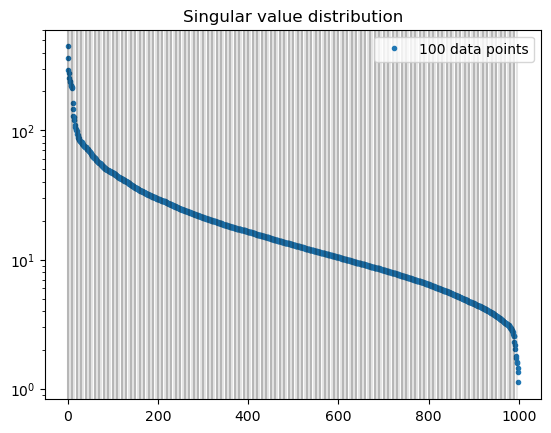

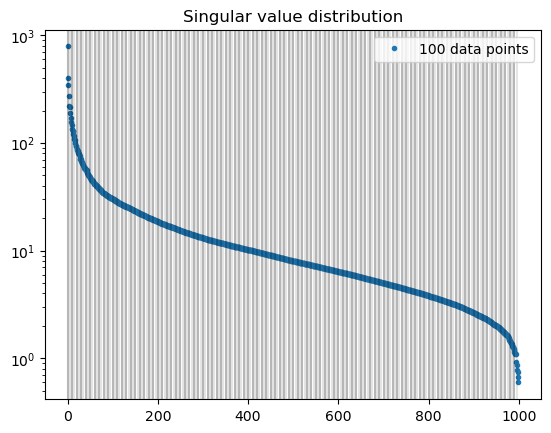

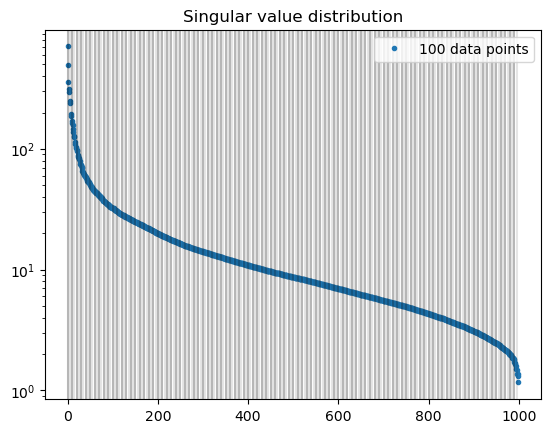

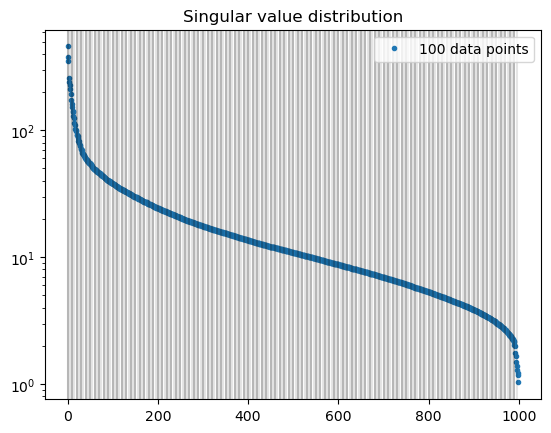

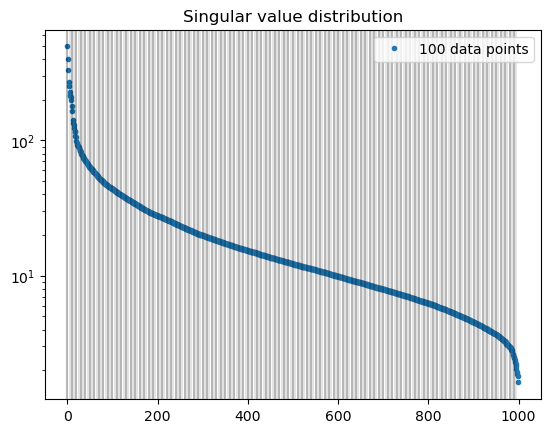

In [193]:
for cnn in good_cnns:
    model = load_model(cnn, loc="models2")
    print(model.singular_value_rank(batch, method="entropy"))
    plot_singular_value_distribution(model, batch)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(422.3183)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(477.6665)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(507.3673)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(478.9513)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(397.9771)


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:523: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


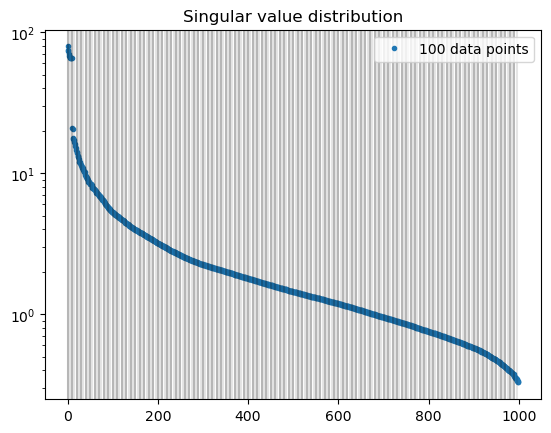

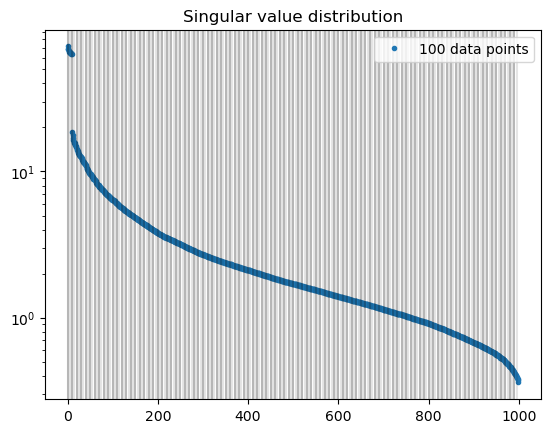

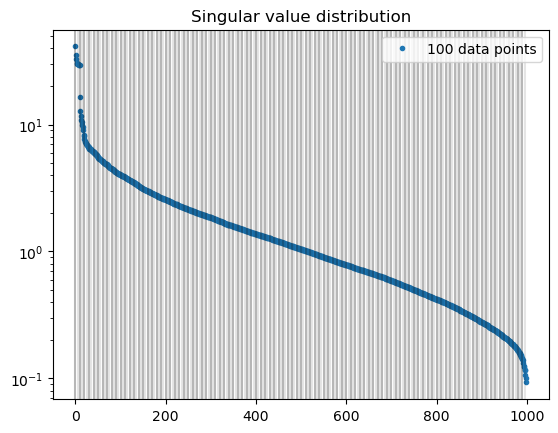

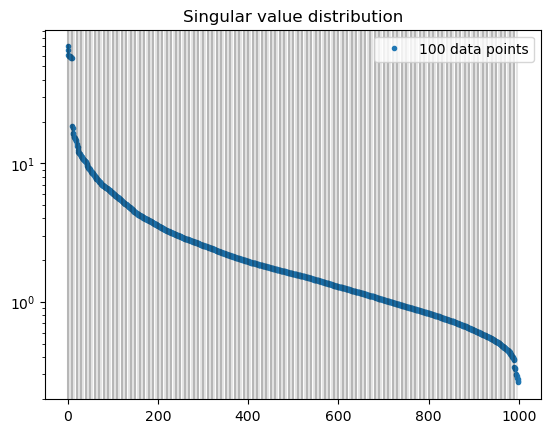

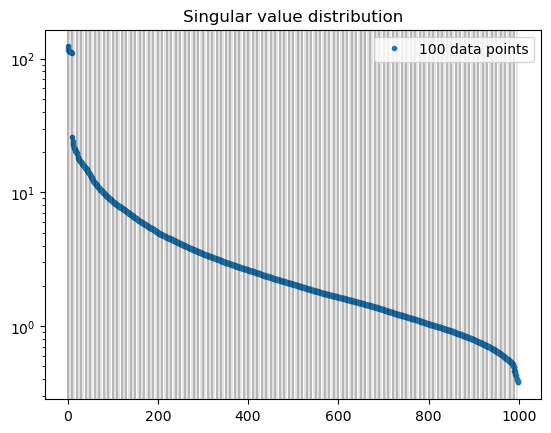

In [194]:
for cnn in good_cnns:
    model = BasicCNN()
    print(model.singular_value_rank(batch, method="entropy"))
    plot_singular_value_distribution(model, batch)

# MLP at initialization

In [78]:
from dots.models import *

In [79]:
mlp = MNIST_MLP(hidden=[512])

In [84]:
batch = range_batch(
    -t.ones([28, 28]),
    t.ones([28, 28]),
    n = 100
)

In [90]:
batch.shape

torch.Size([100, 28, 28])

In [91]:
y = t.zeros(batch.shape[0]).long()

In [92]:
mlp(batch).shape

torch.Size([100, 10])

In [93]:
for i in range(0, 4):
    plot_2d_classification_u_feats(mlp, batch, y, which_feat=i)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


: 

: 